Task 1: Investigate and analyze price data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Nat_Gas.csv to Nat_Gas.csv


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [37]:
# Load the dataset
natgas_df = pd.read_csv('Nat_Gas.csv')

# Convert the 'Dates' column to datetime format
natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])

# Extract 'Year' and 'Month' from 'Dates'
natgas_df['Year'] = natgas_df['Dates'].dt.year
natgas_df['Month'] = natgas_df['Dates'].dt.month

<ipython-input-37-f7490ac758ff>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])


In [38]:
# Function to predict prices for the year following the last available data
def next_year_price(start_year, start_month):
    """Returns a predicted natural gas price for each month starting from the month after the last available data."""
    price_list = []
    current_year = start_year
    current_month = start_month
    for _ in range(12):  # Predict for 12 months
        X = np.array(natgas_df[natgas_df['Month'] == current_month]['Year']).reshape(-1, 1)
        y = np.array(natgas_df[natgas_df['Month'] == current_month]['Prices'])
        reg = LinearRegression().fit(X, y)
        price = reg.predict([[current_year]])
        price_list.append(round(float(price), 2))

        # Move to the next month
        current_month += 1
        if current_month > 12:
            current_month = 1
            current_year += 1

    return price_list

In [39]:
# Get the last date from the available data
last_date = natgas_df['Dates'].max()
last_year = last_date.year
last_month = last_date.month

# Predict prices starting from the month after the last available data
start_year = last_year if last_month < 12 else last_year + 1
start_month = last_month + 1 if last_month < 12 else 1
predicted_prices = next_year_price(start_year, start_month)

# Generate dates for the predicted prices
dates_predicted = pd.date_range(start=pd.to_datetime(f'{start_year}-{start_month}-01'), periods=12, freq='M')

# Create a new DataFrame for the predicted prices
projected_gas_prices_df = pd.DataFrame({
    'Dates': dates_predicted,
    'Prices': predicted_prices
})
projected_gas_prices_df['Year'] = projected_gas_prices_df['Dates'].dt.year
projected_gas_prices_df['Month'] = projected_gas_prices_df['Dates'].dt.month

<ipython-input-38-1766a2910c33>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price_list.append(round(float(price), 2))
<ipython-input-38-1766a2910c33>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price_list.append(round(float(price), 2))
<ipython-input-38-1766a2910c33>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price_list.append(round(float(price), 2))
<ipython-input-38-1766a2910c33>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a

In [46]:
# Function to estimate the price for a specific date (day, month, year)
def estimate_price_specific_date(day, month, year):
    # Ensure the date is valid
    try:
        date = datetime(year, month, day)
    except ValueError:
        raise ValueError("Invalid date provided.")

    # Prepare the data for prediction using only month and year
    X = np.array(natgas_df[natgas_df['Month'] == month]['Year']).reshape(-1, 1)
    y = np.array(natgas_df[natgas_df['Month'] == month]['Prices'])
    reg = LinearRegression().fit(X, y)

    # Predict the price for the given year
    predicted_price = reg.predict([[year]])
    return round(float(predicted_price), 2)

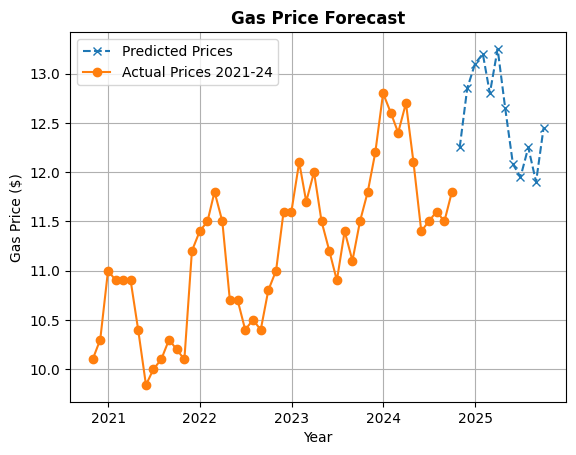

In [47]:
# Final analysis and plot
plt.plot(projected_gas_prices_df['Dates'], projected_gas_prices_df['Prices'], label='Predicted Prices', linestyle='--', marker='x')
plt.plot(natgas_df['Dates'], natgas_df['Prices'], label='Actual Prices 2021-24', marker='o')
plt.ylabel('Gas Price ($)')
plt.xlabel('Year')
plt.title('Gas Price Forecast', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
# Example of estimating the price for a given date
estimated_price = estimate_price_specific_date(25,9,2025)
print(f"Estimated Price on 2025-09-30: {estimated_price:.2f}")

Estimated Price on 2025-09-30: 12.45


<ipython-input-46-3fc600895833>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return round(float(predicted_price), 2)
